In [0]:
!pip install tweepy
!pip install pyspark

In [0]:
df =spark.read.options(mode='FAILFAST', 
                              header = True, 
                              multiLine=True, 
                              inferSchema=True, 
                              escape='"').csv("/FileStore/tables/bank.csv")

In [0]:
import numpy as np 

import os

In [0]:
display(df)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


Exploring The Data

We will use the same data set when we built a Logistic Regression in Python, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (Yes/No) to a term deposit. The dataset can be downloaded from Kaggle.%md

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('/FileStore/tables/bank.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


Analyzing Data

In [0]:
df.groupby('education').count().toPandas()

,education,count
0,unknown,497
1,tertiary,3689
2,secondary,5476
3,primary,1500


In [0]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,11162,41.231947679627304,11.913369192215518,18,95
balance,11162,1528.5385235620856,3225.413325946149,-6847,81204
day,11162,15.658036194230425,8.420739541006462,1,31
duration,11162,371.99381831213043,347.12838571630687,2,3881
campaign,11162,2.508421429851281,2.7220771816614824,1,63
pdays,11162,51.33040673714388,108.75828197197717,-1,854
previous,11162,0.8325568894463358,2.292007218670508,0,58


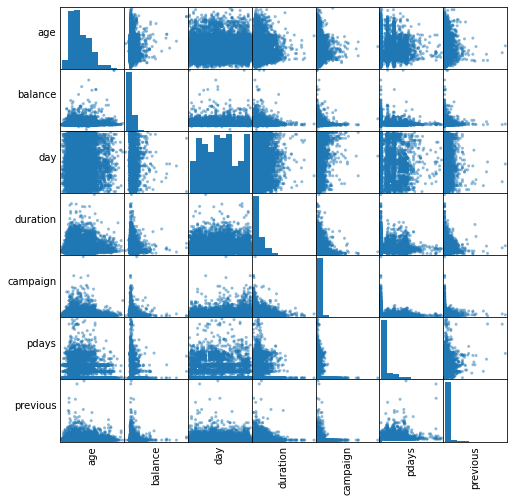

In [0]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [0]:
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
cols = df.columns
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



Preparing Data for Machine Learning

The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

Code given below indexes each categorical column using the StringIndexer, then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row.

We use the StringIndexer again to encode our labels to label indices.

Next, we use the VectorAssembler to combine all the feature columns into a single vector column.

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

stages = []

for categoricalCol in categoricalColumns:
    
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    
    stages += [stringIndexer, encoder]

In [0]:
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')

stages += [label_stringIdx]

numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols

assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

stages += [assembler]

Pipeline

We use Pipeline to chain multiple Transformers and Estimators together to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1.0,1.0,1.0,1.0,1.0
features,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no


In [0]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7855
Test Dataset Count: 3307


Creating Logistic Regression Model

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

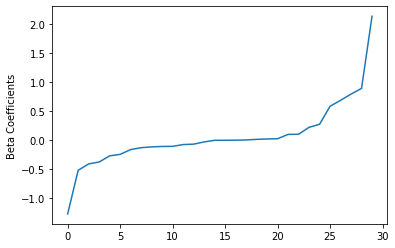

In [0]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


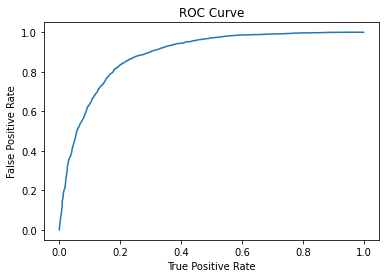

Training set areaUnderROC: 0.8877385690600346


In [0]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Precision and Recall

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


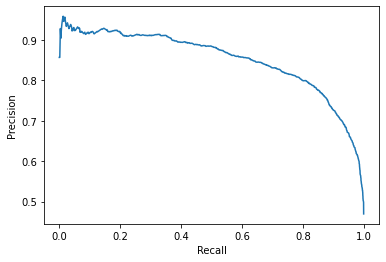

In [0]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [0]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 33|management|  0.0|[1.93084854518134...|       0.0|[0.87334331124860...|
| 49|management|  0.0|[1.92783695472104...|       0.0|[0.87300981013434...|
| 52|management|  0.0|[-0.7737627890180...|       1.0|[0.31566570209269...|
| 53|management|  0.0|[0.94708137344080...|       0.0|[0.72052784002181...|
| 58|management|  0.0|[2.44657764692465...|       0.0|[0.92031082026377...|
| 32|management|  0.0|[1.28386077546043...|       0.0|[0.78310624913887...|
| 57|management|  0.0|[1.05745870556538...|       0.0|[0.74220460119093...|
| 52|management|  0.0|[3.25200815517468...|       0.0|[0.96274520587479...|
| 46|management|  0.0|[2.24978402804244...|       0.0|[0.90463190417563...|
| 31|management|  0.0|[1.47121751117281...|       0.0|[0.81324237120149...|
+---+-------

Evaluate Logistic Regression

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.885643189559481


Decision Tree Classifier

Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multi-class classification, do not require feature scaling, and are able to capture non-linearities and feature interactions.

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'education', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+---------+-----+--------------+----------+--------------------+
|age|education|label| rawPrediction|prediction|         probability|
+---+---------+-----+--------------+----------+--------------------+
| 33|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 49|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 52|secondary|  0.0|[520.0,1931.0]|       1.0|[0.21215830273357...|
| 53|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 58|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 32|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 57|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 52|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 46|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
| 31|secondary|  0.0|[2498.0,481.0]|       0.0|[0.83853642161799...|
+---+---------+-----+--------------+----------+--------------------+
only showing top 10 rows



In [0]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7808118726917547


Random Forest Classifier

In [0]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'education', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+---------+-----+--------------------+----------+--------------------+
|age|education|label|       rawPrediction|prediction|         probability|
+---+---------+-----+--------------------+----------+--------------------+
| 33|secondary|  0.0|[15.1502363257935...|       0.0|[0.75751181628967...|
| 49|secondary|  0.0|[15.0268823941769...|       0.0|[0.75134411970884...|
| 52|secondary|  0.0|[6.45157175624421...|       1.0|[0.32257858781221...|
| 53|secondary|  0.0|[14.2305502576427...|       0.0|[0.71152751288213...|
| 58|secondary|  0.0|[15.6248584129298...|       0.0|[0.78124292064649...|
| 32|secondary|  0.0|[15.4925318353978...|       0.0|[0.77462659176989...|
| 57|secondary|  0.0|[14.8285262763956...|       0.0|[0.74142631381978...|
| 52|secondary|  0.0|[17.1115052569861...|       0.0|[0.85557526284930...|
| 46|secondary|  0.0|[17.1263883107242...|       0.0|[0.85631941553621...|
| 31|secondary|  0.0|[15.8795209580104...|       0.0|[0.79397604790052...|
+---+---------+-----+----

In [0]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8807102073869716


Gradient-Boosted Tree Classifier

In [0]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'education', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+---------+-----+--------------------+----------+--------------------+
|age|education|label|       rawPrediction|prediction|         probability|
+---+---------+-----+--------------------+----------+--------------------+
| 33|secondary|  0.0|[0.94992370947246...|       0.0|[0.86987425549896...|
| 49|secondary|  0.0|[1.28281748604659...|       0.0|[0.92861688965145...|
| 52|secondary|  0.0|[-0.5021429054421...|       1.0|[0.26809961471379...|
| 53|secondary|  0.0|[0.09646513340517...|       0.0|[0.54808351175538...|
| 58|secondary|  0.0|[1.05831377292163...|       0.0|[0.89250881497055...|
| 32|secondary|  0.0|[0.57268875896254...|       0.0|[0.75866558918304...|
| 57|secondary|  0.0|[0.34932946844840...|       0.0|[0.66789037418062...|
| 52|secondary|  0.0|[1.33264456943866...|       0.0|[0.93494709840561...|
| 46|secondary|  0.0|[1.28262818068783...|       0.0|[0.92859178839697...|
| 31|secondary|  0.0|[1.16094954405484...|       0.0|[0.91067454521219...|
+---+---------+-----+----

In [0]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8935091626908479


In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

Out[112]: 0.8954659543871663

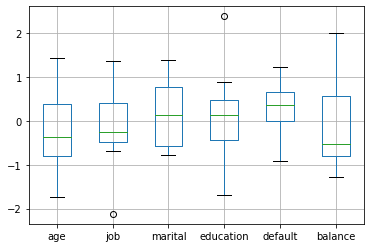

In [0]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 17),
                  columns=['label',
 'features',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit'])
boxplot = df.boxplot(column=['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',]) 